## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = pd.read_csv('BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

arvore = DecisionTreeRegressor(random_state=0)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [22]:
path = arvore.cost_complexity_pruning_path(X_train, y_train)

In [39]:
ccp_alphas = path.ccp_alphas
impurities = path.impurities
df_alphas = pd.DataFrame({'alpha' : ccp_alphas, 'impurities' : impurities})
df_alphas

,alpha,impurities
0,0.000000e+00,-4.660679e-14
1,1.605746e-16,-4.644621e-14
2,9.634478e-16,-4.548276e-14
3,1.284597e-15,-4.419817e-14
4,1.284597e-14,-3.135220e-14
...,...,...
322,3.401790e+00,1.952308e+01
323,4.174486e+00,2.369757e+01
324,8.292593e+00,3.199016e+01
325,1.298253e+01,4.497269e+01


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [24]:
arvores = []
for ccp in ccp_alphas:
    dtr = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp)
    dtr.fit(X_train, y_train)
    arvores.append(dtr)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [26]:
mses = []
for dtr in arvores:
    predictions = dtr.predict(X_test)
    mses.append(mean_squared_error(y_test, predictions))

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

<AxesSubplot: >

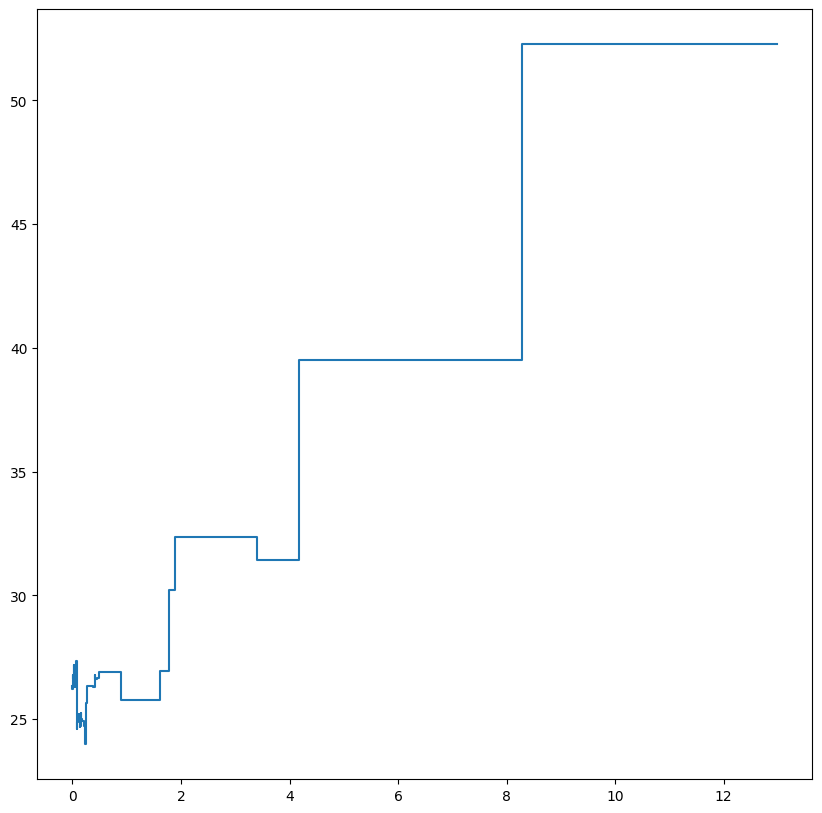

In [44]:
plt.figure(figsize = (10,10))
sns.lineplot(x=ccp_alphas[:-1], y=mses[:-1], drawstyle='steps-pre')

In [42]:
df_alphas[(df_alphas['alpha'] >= 1.5) & (df_alphas['alpha'] <= 2)]

,alpha,impurities
319,1.615652,12.455699
320,1.778968,14.234667
321,1.886625,16.121291


> De acordo com o gráfico da relação MSE x ccp_alpha, foi selecionado o ccp **1.778968**, que se encontra perto do ponto de mínimo do MSE entre os intervalo de 1.5 a 2.0

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [53]:
arvore = arvores[320]
arvore.score(X_test, y_test)

0.6764718606590874

### 7. Visualize esta árvore.

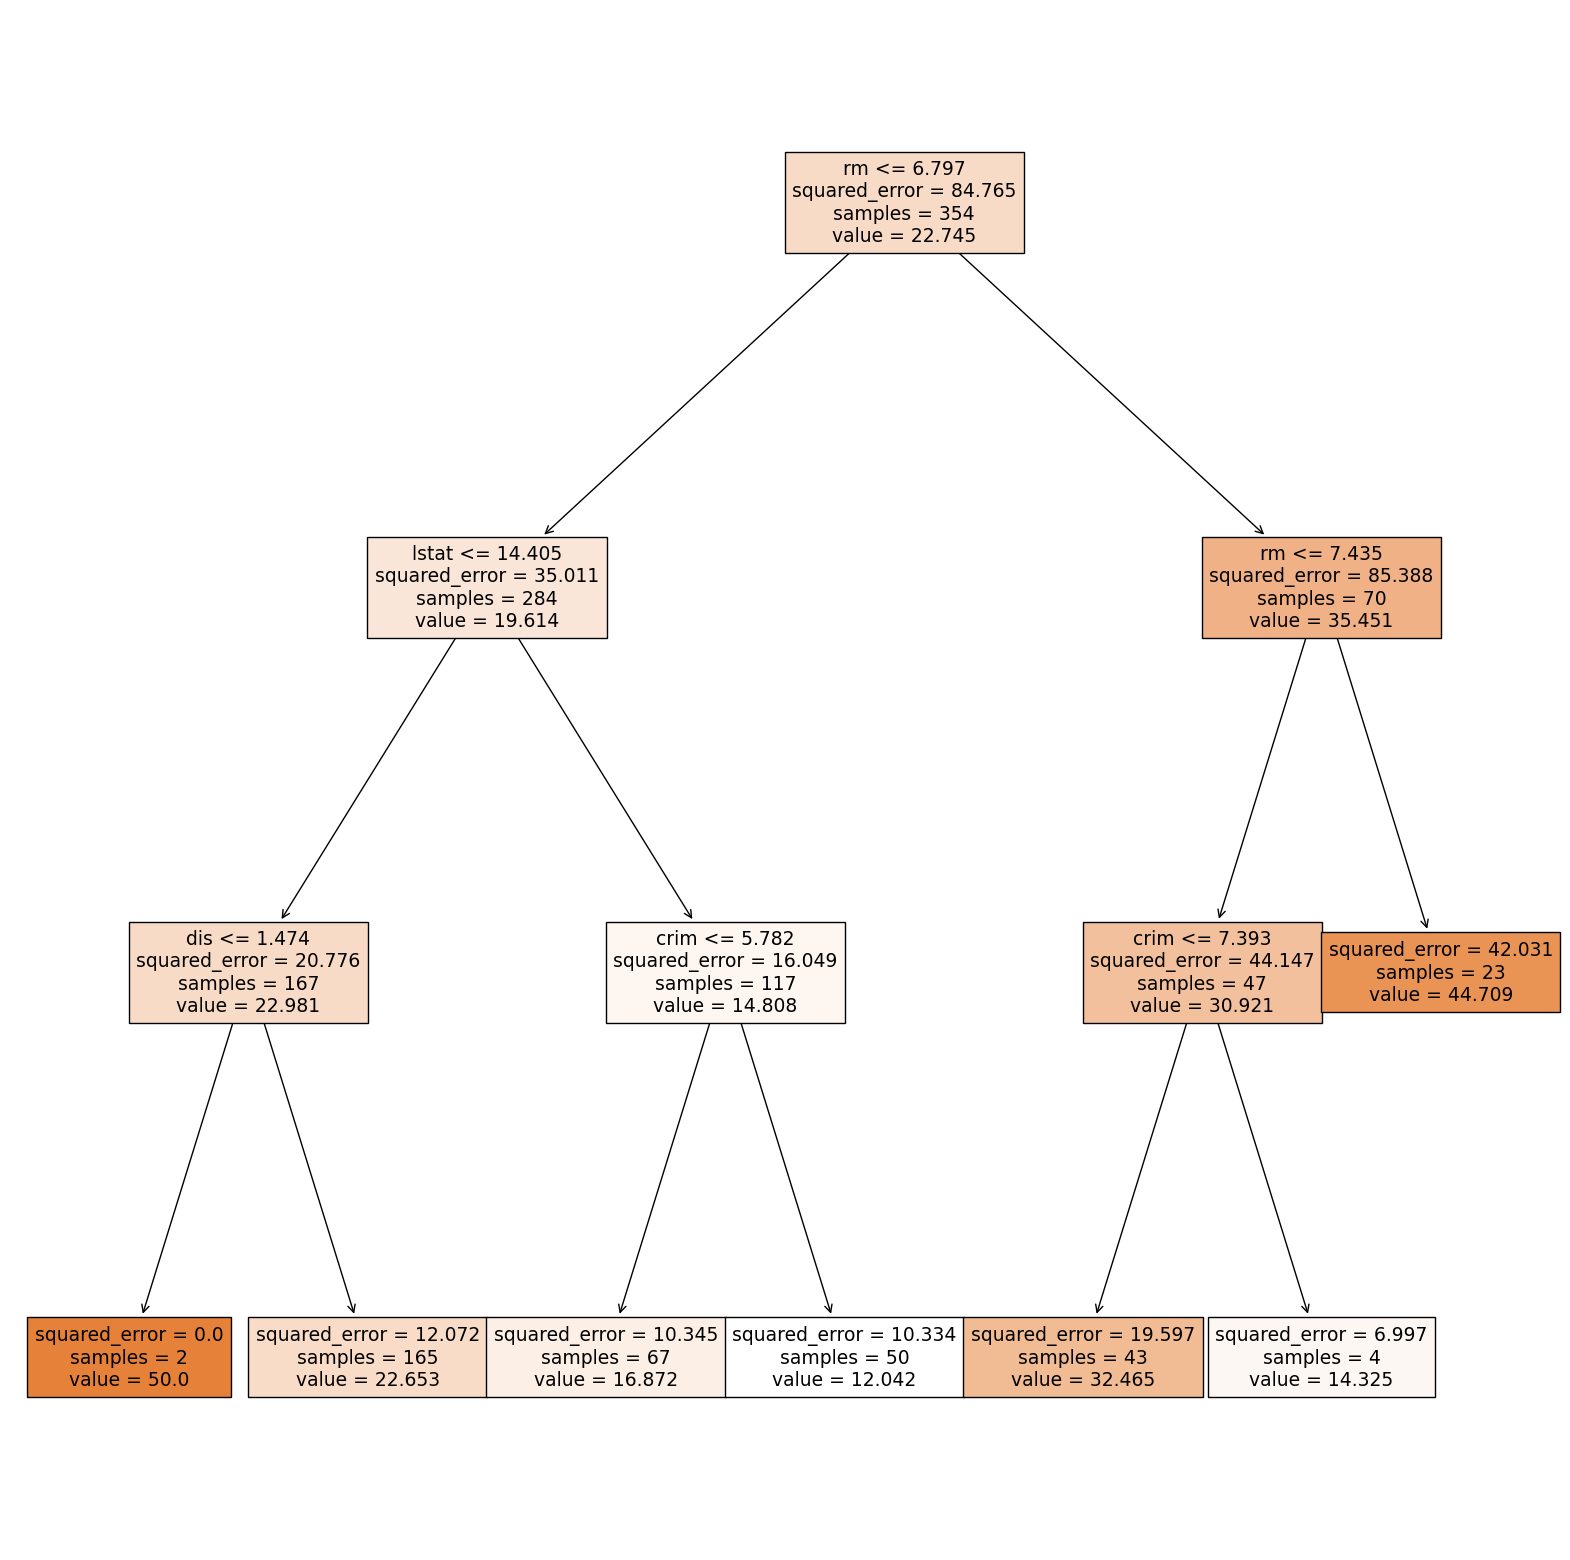

In [57]:
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(arvore, feature_names=X.columns, filled=True)